# Training an intents classification model

Define constants

In [1]:
from os import getcwd, path
import sys
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = path.dirname(getcwd())
sys.path.append(BASE_PATH)

DATA_UTILS = path.join(BASE_PATH, 'common/data_utils.py')
TRAIN_PATH = path.join(BASE_PATH, 'kc_data.json')
CLASSES_FILE = path.join(BASE_PATH, 'classes.json')

In [2]:
exec(open(DATA_UTILS).read())

Use functions from the utils to extract and preprocess the training data
Refer to `kc_data.json` for the sample data format
`get_data_pairs` is then used to parse data into a tuple of `([list_of_sentences], [list_of_labels])`

In [3]:
X_data, y_data = get_data_pairs(data_from_json(TRAIN_PATH))

classes = list(set(y_data))
num_classes = len(classes)

X_train = X_data
y_train = np.array([
    classes.index(item)
    for item in y_data
], dtype='int32')

Plot the training data

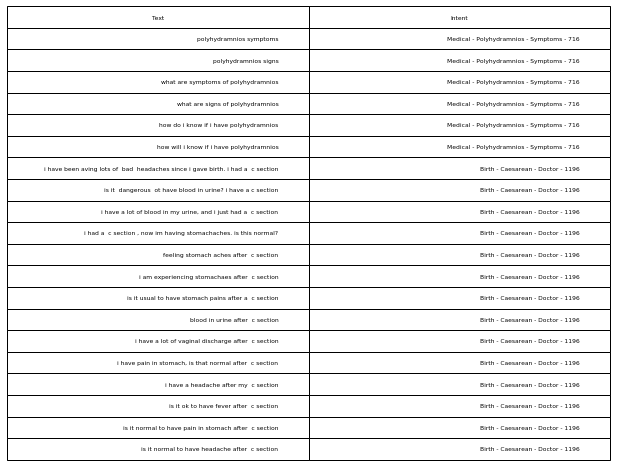

In [4]:
cell_text = [
    [item, y_data[idx] + ' - ' + str(int(y_train[idx]))] 
    for (idx, item) in enumerate(X_train)
]
plt.table(cellText=cell_text[:20],
          colLabels=['Text', 'Intent'],
          loc='center') \
   .scale(1.8,1.8)
plt.axis('off')
plt.show()

In [5]:
print('Number of samples: %s, classes: %s' % (len(X_train), num_classes))

Number of samples: 10256, classes: 1427


Save the classes descriptions as json

In [6]:
import json

with open(CLASSES_FILE, 'w') as classes_file:
    json.dump(classes, classes_file)

In [7]:
import torch
torch.__version__

'0.4.1'

Start training the classification model and save

In [8]:
import torch.optim as optim
from text_classification.sif_starspace.model import StarspaceClassifierWrapper
from text_classification.sif_starspace.train import StarspaceClassifierLearner
from common.callbacks import PrintLoggerCallback, EarlyStoppingCallback

model = StarspaceClassifierWrapper({'num_classes': num_classes})
# learner = StarspaceClassifierLearner(model, 
#     optimizer_fn=optim.SGD, 
#     optimizer_kwargs={'lr': 0.01, 'momentum': 0.9}
# )
learner = StarspaceClassifierLearner(model)

In [ ]:
learner.fit(
    training_data=(X_train, y_train),
    batch_size=64,
    epochs=300,
    callbacks=[
        PrintLoggerCallback(log_every=1),
        EarlyStoppingCallback(tolerance=0)
    ]
)

2m 6s (- 629m 55s) (1 0%) - loss: 945.1815 - accuracy: 0.0620
4m 5s (- 610m 2s) (2 0%) - loss: 811.8641 - accuracy: 0.2568
6m 53s (- 683m 0s) (3 1%) - loss: 736.3336 - accuracy: 0.3418
9m 56s (- 735m 29s) (4 1%) - loss: 681.1647 - accuracy: 0.3786
12m 44s (- 751m 20s) (5 1%) - loss: 634.4052 - accuracy: 0.3977
15m 29s (- 758m 44s) (6 2%) - loss: 594.0459 - accuracy: 0.4046
18m 10s (- 760m 57s) (7 2%) - loss: 557.7455 - accuracy: 0.4046
20m 52s (- 762m 9s) (8 2%) - loss: 526.6995 - accuracy: 0.4085
23m 34s (- 762m 18s) (9 3%) - loss: 497.9959 - accuracy: 0.4121
26m 44s (- 775m 43s) (10 3%) - loss: 472.5944 - accuracy: 0.4211
29m 56s (- 786m 49s) (11 3%) - loss: 449.8792 - accuracy: 0.4272
34m 5s (- 818m 5s) (12 4%) - loss: 429.3818 - accuracy: 0.4319
37m 49s (- 835m 6s) (13 4%) - loss: 411.3911 - accuracy: 0.4457
41m 7s (- 840m 2s) (14 4%) - loss: 395.6435 - accuracy: 0.4511
44m 7s (- 838m 23s) (15 5%) - loss: 380.6738 - accuracy: 0.4628
47m 5s (- 835m 59s) (16 5%) - loss: 367.4083 - ac

In [ ]:
torch.topk(model(['I\'m having diahrea']), 50)

In [ ]:
torch.topk(model(['the earth is flat']), 50)

In [ ]:
classes[1251]